# Analysis of model results and embedding experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers, models, Sequential, Input, Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.data.experimental import cardinality
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras.models import load_model

## Load model and results analysis

In [2]:
model = load_model('../models/20201210_170338_VGG16_v2_0/')
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_4  (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_BiasAdd_4 (Tenso (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 100)               17223588  
_________________________________________________________________
dense_12 (Dense)             (None, 12)                1212      
Total params: 17,224,800
Trainable params: 17,224,800
Non-trainable params: 0
_________________________________________________________________


In [3]:
path0 = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small'

In [4]:
test_dir = path0

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

test_dataset = image_dataset_from_directory(test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='categorical')

class_names = test_dataset.class_names
n_artist = len(class_names)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print('Number of test batches: %d' % cardinality(test_dataset))

Found 58 files belonging to 12 classes.
Number of test batches: 2


In [5]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 19s 7s/step - loss: 0.6109 - accuracy: 0.8276
Test accuracy : 0.8275862336158752


In [6]:
predictions = model.predict(test_dataset)

In [7]:
predictions.shape

(58, 12)

In [8]:
np.argmax(predictions, axis =1)

array([10,  0,  0, 11,  0,  0,  1,  1,  5, 11,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  0,  4,  4,  8,  5, 11,  5,  5,  5,  6,  6, 11,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10,  3, 11, 11, 11], dtype=int64)

In [9]:
label = np.concatenate([label for im, label in test_dataset])
label

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.,

In [10]:
np.array(label).shape

(58, 12)

In [11]:
np.argmax(label, axis=1)

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 11, 11, 11, 11], dtype=int64)

In [12]:
np.sum(np.argmax(predictions, axis =1) == np.argmax(label, axis=1))/len(np.argmax(label, axis=1))

0.8275862068965517

In [13]:
predictions[0]

array([1.2306109e-01, 5.9489469e-04, 2.3959687e-03, 4.3867840e-03,
       1.5665267e-03, 3.5306279e-04, 4.2976048e-02, 7.6306229e-03,
       8.4147359e-05, 5.3108239e-04, 7.9866463e-01, 1.7755089e-02],
      dtype=float32)

OK : able to retrieve prediction and artist, using image_dataset_from_directory

## Test 1 image by 1

In [14]:
n_art = 9
n_im = 3

In [15]:
folder = os.path.join(path0, f"_{n_art}")
file_list = os.listdir(folder)
image_to_predict = os.path.join(path0, f"_{n_art}", file_list[n_im])
print(image_to_predict)
im_224 = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
im_224 = np.array(im_224.getdata()).reshape(im_224.size[0], im_224.size[1], 3)
im_224 = np.expand_dims(im_224, axis = 0)

C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small\_9\521.jpg


In [16]:
pred = model.predict(im_224)
proba = pred[0]
print(proba)
artiste_index = np.argmax(pred[0])
print(class_names[artiste_index])


[4.3762571e-01 3.9337771e-03 1.0041299e-02 3.7460264e-03 9.0952860e-03
 4.8218057e-03 1.8679758e-03 6.6875771e-04 1.1162045e-04 6.9850724e-04
 6.1482888e-02 4.6590632e-01]
_9


OK : able to correctly identify artist, most of the time

## Clean implementation

In [17]:
test_dir = path0

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

test_dataset = image_dataset_from_directory(test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='categorical')

class_names = test_dataset.class_names
n_artist = len(class_names)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print('Number of test batches: %d' % cardinality(test_dataset))

label = np.concatenate([lab for im, lab in test_dataset])
artist_id = [class_names[i] for i in np.argmax(label, axis=1)]
artist_id[::10]

Found 58 files belonging to 12 classes.
Number of test batches: 2


['_1', '_11', '_2', '_4', '_6', '_8']

In [18]:
predictions = model.predict(test_dataset)
predict_artist_id = [class_names[i] for i in np.argmax(predictions, axis=1)]
predict_artist_id[::10]

['_8', '_11', '_2', '_4', '_6', '_8']

In [19]:
results_comp_df = pd.DataFrame({'artist_class':artist_id, 'predicted_artist_class':predict_artist_id})
results_comp_df.head(10)

,artist_class,predicted_artist_class
0,_1,_8
1,_1,_1
2,_1,_1
3,_1,_9
4,_1,_1
5,_10,_1
6,_10,_10
7,_10,_10
8,_10,_3
9,_10,_9


## Predict from one directory

In [20]:
test_dir2 = os.path.join(path0+'2')
img_list =os.listdir(test_dir2+'\_1')
test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='nearest')

class_names2 = test_dataset2.class_names
print('Number of test batches: %d' % cardinality(test_dataset2))

Found 10 files belonging to 1 classes.
Number of test batches: 1


In [21]:
img_list

['1105.jpg',
 '13.jpg',
 '1558.jpg',
 '1703.jpg',
 '1758.jpg',
 '3094.jpg',
 '5452.jpg',
 '5492.jpg',
 '949.jpg',
 '971.jpg']

In [22]:
predictions2 = model.predict(test_dataset2)
predict_artist_id2 = [class_names[i] for i in np.argmax(predictions2, axis=1)]
predict_artist_id2

['_8', '_1', '_9', '_1', '_2', '_1', '_2', '_2', '_6', '_1']

In [23]:
predictions2

array([[1.22825854e-01, 5.94358600e-04, 2.41160905e-03, 4.37071174e-03,
        1.57297985e-03, 3.54919757e-04, 4.29733694e-02, 7.61166913e-03,
        8.39384666e-05, 5.29799610e-04, 7.98870027e-01, 1.78007968e-02],
       [4.66690660e-01, 4.92243804e-02, 1.77445680e-01, 6.00854270e-02,
        5.88243380e-02, 1.35222897e-02, 1.78471964e-03, 9.48769506e-03,
        6.50698226e-03, 3.12309209e-02, 5.11724465e-02, 7.40244538e-02],
       [2.44275272e-01, 6.65255473e-04, 1.39030460e-02, 8.85368977e-03,
        2.55344152e-01, 1.29248844e-02, 8.82054796e-04, 1.03442860e-03,
        6.03035209e-04, 1.05106726e-03, 7.45229870e-02, 3.85940135e-01],
       [3.92158896e-01, 1.22291525e-03, 4.26387675e-02, 1.59961525e-02,
        1.07701585e-01, 5.85449580e-03, 3.75461765e-03, 1.40123838e-03,
        9.55602562e-04, 2.18785703e-02, 2.39113029e-02, 3.82525861e-01],
       [2.58256923e-02, 7.97466957e-04, 5.54994587e-03, 4.38283198e-03,
        8.71196926e-01, 2.52576731e-02, 3.33427161e-05, 1.81

In [24]:
proba_list = []
for img in img_list:
    image_to_predict = os.path.join(path0+'2', f"_{1}", img)
    print(image_to_predict)
    im_224 = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='nearest')
    im_224 = np.array(im_224.getdata()).reshape(im_224.size[0], im_224.size[1], 3)
    im_224 = np.expand_dims(im_224, axis = 0)
    pred = model.predict(im_224)
    proba = pred[0]
    print(proba)
    artiste_index = np.argmax(pred[0])
    print(class_names[artiste_index])
    proba_list.append(proba)

C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1105.jpg
[1.1399156e-01 5.7361583e-04 3.0993740e-03 3.7899774e-03 1.8426863e-03
 4.3442362e-04 4.2842057e-02 6.9092405e-03 7.6195414e-05 4.8218863e-04
 8.0631053e-01 1.9648081e-02]
_8
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\13.jpg
[0.4671781  0.04926803 0.17549056 0.06102553 0.05839647 0.01354559
 0.00179631 0.00961945 0.00652673 0.0314418  0.05147595 0.07423558]
_1
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1558.jpg
[0.24461357 0.0006642  0.01392696 0.00883793 0.25575083 0.01294006
 0.00088109 0.001032   0.00060404 0.00105019 0.0743338  0.38536534]
_9
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1703.jpg
[0.31970528 0.00107269 0.02661067 0.01712324 0.15436104 0.00366083
 0.00267181 0.00189793 0.00073857 0.02144414 0.01398192 0.43673187]
_9
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1758.jpg
[2.5830938e-02 8.0084108e-04 5.5413791

In [25]:
np.array(proba_list)

array([[1.1399156e-01, 5.7361583e-04, 3.0993740e-03, 3.7899774e-03,
        1.8426863e-03, 4.3442362e-04, 4.2842057e-02, 6.9092405e-03,
        7.6195414e-05, 4.8218863e-04, 8.0631053e-01, 1.9648081e-02],
       [4.6717811e-01, 4.9268030e-02, 1.7549056e-01, 6.1025526e-02,
        5.8396470e-02, 1.3545586e-02, 1.7963117e-03, 9.6194483e-03,
        6.5267310e-03, 3.1441800e-02, 5.1475946e-02, 7.4235581e-02],
       [2.4461357e-01, 6.6420034e-04, 1.3926962e-02, 8.8379281e-03,
        2.5575083e-01, 1.2940063e-02, 8.8108639e-04, 1.0320023e-03,
        6.0403562e-04, 1.0501876e-03, 7.4333802e-02, 3.8536534e-01],
       [3.1970528e-01, 1.0726863e-03, 2.6610669e-02, 1.7123241e-02,
        1.5436104e-01, 3.6608318e-03, 2.6718075e-03, 1.8979345e-03,
        7.3857128e-04, 2.1444138e-02, 1.3981917e-02, 4.3673187e-01],
       [2.5830938e-02, 8.0084108e-04, 5.5413791e-03, 4.3850676e-03,
        8.7115967e-01, 2.5348131e-02, 3.3243690e-05, 1.8151808e-03,
        1.2187238e-04, 1.1868917e-04, 1.0682

In [26]:
predictions2

array([[1.22825854e-01, 5.94358600e-04, 2.41160905e-03, 4.37071174e-03,
        1.57297985e-03, 3.54919757e-04, 4.29733694e-02, 7.61166913e-03,
        8.39384666e-05, 5.29799610e-04, 7.98870027e-01, 1.78007968e-02],
       [4.66690660e-01, 4.92243804e-02, 1.77445680e-01, 6.00854270e-02,
        5.88243380e-02, 1.35222897e-02, 1.78471964e-03, 9.48769506e-03,
        6.50698226e-03, 3.12309209e-02, 5.11724465e-02, 7.40244538e-02],
       [2.44275272e-01, 6.65255473e-04, 1.39030460e-02, 8.85368977e-03,
        2.55344152e-01, 1.29248844e-02, 8.82054796e-04, 1.03442860e-03,
        6.03035209e-04, 1.05106726e-03, 7.45229870e-02, 3.85940135e-01],
       [3.92158896e-01, 1.22291525e-03, 4.26387675e-02, 1.59961525e-02,
        1.07701585e-01, 5.85449580e-03, 3.75461765e-03, 1.40123838e-03,
        9.55602562e-04, 2.18785703e-02, 2.39113029e-02, 3.82525861e-01],
       [2.58256923e-02, 7.97466957e-04, 5.54994587e-03, 4.38283198e-03,
        8.71196926e-01, 2.52576731e-02, 3.33427161e-05, 1.81

In [27]:
print(np.argmax(predictions2, axis=1))
print(np.argmax(np.array(proba_list), axis=1))

[10  0 11  0  4  0  4  4  8  0]
[10  0 11 11  4  0  4  4  8  0]


In [28]:
print(predictions2[-2])
print(np.array(proba_list)[-2])

[0.00731106 0.01471625 0.0769645  0.01188238 0.24030256 0.00372476
 0.00571725 0.00097666 0.58435184 0.04511663 0.00121045 0.00772553]
[0.01374307 0.01469577 0.04356514 0.01710582 0.37497061 0.00238203
 0.0045921  0.00120514 0.49529234 0.02550557 0.00161519 0.00532719]


## Compare raw data from both load method

array([[232, 240, 235, 235, 232, 238, 231, 229, 226, 223],
       [234, 228, 226, 235, 244, 231, 236, 236, 237, 234],
       [237, 235, 237, 228, 236, 229, 234, 225, 232, 230],
       [236, 232, 237, 233, 238, 232, 237, 223, 231, 235],
       [229, 239, 239, 229, 249, 231, 228, 227, 236, 236],
       [242, 237, 243, 234, 239, 231, 228, 233, 237, 228],
       [228, 234, 242, 237, 237, 230, 245, 232, 216, 222],
       [244, 233, 226, 231, 234, 237, 233, 233, 228, 220],
       [236, 233, 234, 227, 228, 229, 231, 231, 220, 223],
       [241, 236, 238, 232, 222, 227, 228, 228, 220, 218]])

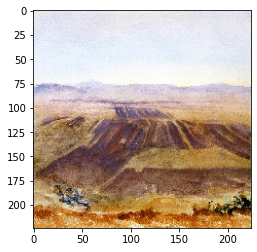

In [29]:
image_to_predict = os.path.join(path0+'2', f"_{1}", img_list[0])
im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='nearest')
plt.imshow(im_li);
im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
im_li[0:10,0:10,0]

In [30]:
test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='nearest')
image_dfd_list = [im for im, lab in test_dataset2]

Found 10 files belonging to 1 classes.


array([[231, 240, 235, 235, 231, 238, 231, 228, 226, 222],
       [234, 227, 226, 234, 244, 231, 235, 235, 236, 233],
       [237, 235, 237, 227, 235, 229, 233, 224, 232, 230],
       [236, 232, 236, 233, 237, 232, 237, 223, 231, 235],
       [228, 238, 239, 228, 248, 230, 225, 224, 236, 236],
       [242, 237, 243, 234, 238, 231, 225, 230, 235, 228],
       [228, 234, 241, 237, 236, 230, 243, 230, 213, 222],
       [243, 232, 225, 230, 234, 237, 230, 231, 226, 219],
       [236, 233, 234, 227, 227, 229, 228, 228, 218, 223],
       [241, 236, 237, 229, 220, 225, 226, 226, 217, 216]], dtype=uint8)

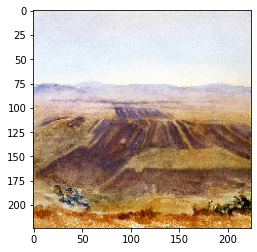

In [31]:
im_dfd = np.array(image_dfd_list[0][0])
plt.imshow(im_dfd);
im_dfd[0:10,0:10,0]

In [32]:
np.sum(im_dfd!=im_li)

100842

In [33]:
np.sqrt(np.sum((im_dfd-im_li)**2)/im_li.size)

1.421415298155304

Found 10 files belonging to 1 classes.
bilinear
Nb of different pixels: 150301
Distance: 7.369
Found 10 files belonging to 1 classes.
nearest
Nb of different pixels: 99068
Distance: 1.374
Found 10 files belonging to 1 classes.
bicubic
Nb of different pixels: 150528
Distance: 7.337


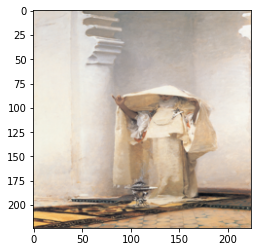

In [34]:
n_im = 1
int_met = ['bilinear', 'nearest', 'bicubic']
image_to_predict = os.path.join(path0+'2', f"_{1}", img_list[n_im])
for met in int_met:
    test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation=met)
    image_dfd_list = [im for im, lab in test_dataset2]
    im_dfd = np.array(image_dfd_list[0][n_im])
    im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation=met)
    plt.imshow(im_li);
    im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
    
    print(met)
    print(f"Nb of different pixels: {np.sum(im_dfd!=im_li)}")
    print(f"Distance: {np.sqrt(np.sum((im_dfd-im_li)**2)/im_li.size):.3f}")

Differences in the way the images are loaded with both models

## Play with embeddings

In [50]:
layer_outputs = [model.layers[-1].input]
embedding_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [51]:
embedding_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_4  (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_BiasAdd_4 (Tenso (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 100)               17223588  
Total params: 17,223,588
Trainable params: 17,223,588
Non-trainable params: 0
_________________________________________________________________


In [60]:
test_dir2 = os.path.join(path0+'2')
img_list =os.listdir(test_dir2+'\_1')
test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='bilinear')

class_names2 = test_dataset2.class_names
img_list

Found 10 files belonging to 1 classes.


['1105.jpg',
 '13.jpg',
 '1558.jpg',
 '1703.jpg',
 '1758.jpg',
 '3094.jpg',
 '5452.jpg',
 '5492.jpg',
 '949.jpg',
 '971.jpg']

In [61]:
test_dir_1im = os.path.join(path0+'_1im')
img_list_1im =os.listdir(test_dir_1im+'\_1')
test_dataset_1im = image_dataset_from_directory(test_dir_1im, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list_1im, interpolation='bilinear')

img_list_1im

Found 1 files belonging to 1 classes.


['3094.jpg']

In [62]:
image_embeddings = embedding_model.predict(test_dataset2)
image_embeddings.shape

(10, 100)

In [63]:
image_embeddings_1im = embedding_model.predict(test_dataset_1im)
image_embeddings_1im

array([[-1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,
         1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
         1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
        -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.]], dtype=float32)

In [64]:
dist_list = []
for i in range(len(image_embeddings)):
    dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_1im[0])**2)))
dist_list

[9.165151,
 6.5036783,
 6.633173,
 6.5896254,
 7.7459664,
 0.0,
 8.717723,
 10.952004,
 8.852835,
 6.6291428]

In [65]:
img_list[np.argmin(dist_list)]

'3094.jpg'

## Let's scale up a bit...

In [69]:
test_dir = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test'

['_1', '_10', '_11', '_12', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9']

In [105]:
%%time
layer_outputs = [model.layers[-1].input]
embedding_model = models.Model(inputs=model.input, outputs=layer_outputs)

test_dir = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test'
img_list = []
#for dir_path in os.listdir(test_dir):
#    img_list += os.listdir(os.path.join(test_dir, dir_path))
for root, dirs, files in os.walk(test_dir, topdown=True):
    for name in files:
        img_list.append(os.path.join(name))
test_dataset = image_dataset_from_directory(test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='bilinear')

image_embeddings = embedding_model.predict(test_dataset)
image_embeddings.shape

Found 1390 files belonging to 12 classes.
Wall time: 5min 35s


(1390, 100)

In [106]:
test_dir_1im = os.path.join(path0+'_1im')
img_list_1im =os.listdir(test_dir_1im+'\_1')
#test_dataset_1im = image_dataset_from_directory(test_dir_1im, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
#                                             labels=img_list_1im, interpolation='bilinear')

image_to_predict = os.path.join(test_dir_1im, '_1', img_list_1im[1])
im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
im_li = np.expand_dims(im_li,axis =0)
print(img_list_1im)
image_embeddings_1im = embedding_model.predict(im_li)
image_embeddings_1im.shape

['12798.jpg', '6426.jpg', '76841.jpg']


(1, 100)

In [103]:
predict_image = []
for j in range(len(img_list_1im)):
    dist_list = []
    for i in range(len(image_embeddings)):
        dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_1im[j])**2)))
    print(np.min(dist_list))
    predict_image.append(img_list[np.argmin(dist_list)])
predict_image

2.578109


IndexError: index 1 is out of bounds for axis 0 with size 1

In [107]:

dist_list = []
for i in range(len(image_embeddings)):
    dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_1im[0])**2)))
print(np.min(dist_list))
img_list[np.argmin(dist_list)]


2.578109


'6426.jpg'

In [108]:
len(dist_list)

1390

5.185185185185185

## Test avec images extérieures

In [112]:
test_dir_imext = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Donnees_tests\Données tests\Picasso'
img_list_imext =os.listdir(test_dir_imext+'\_1')
test_dataset_imext = image_dataset_from_directory(test_dir_imext, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list_imext, interpolation='bilinear')


print(img_list_imext)
image_embeddings_imext = embedding_model.predict(test_dataset_imext)
image_embeddings_imext.shape

Found 7 files belonging to 1 classes.
['32688_xl.jpg', '711K+aMaSGL._AC_SX466_.jpg', '71L7b+wAQkL._AC_SL1000_.jpg', 'Detournement-Femme-livre-Pablo-Picasso-publicite-812x700.jpg', 'images.jpg', 'STVLCRTKQGOJWUKAV5JFAI77GA.jpg', 'tableaux-sur-toile-le-reve-de-pablo-picasso.jpg']


(7, 100)

5.1083145
4.610156
3.2062402
3.4640207
4.898937
4.484226
4.901152


['60330.jpg',
 '33332.jpg',
 '60330.jpg',
 '96808.jpg',
 '10166.jpg',
 '17480.jpg',
 '101621.jpg']

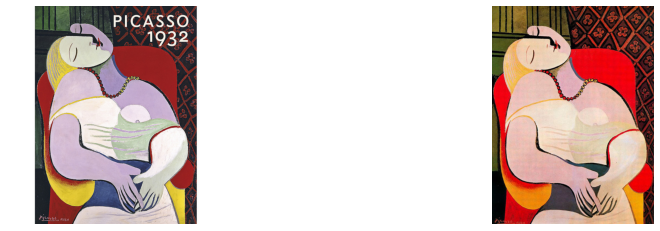

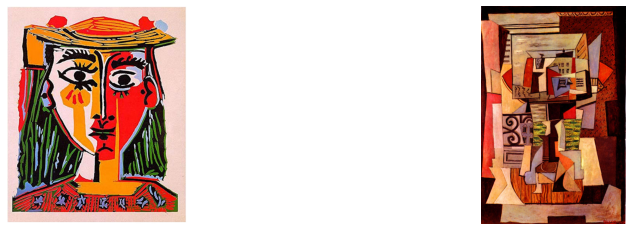

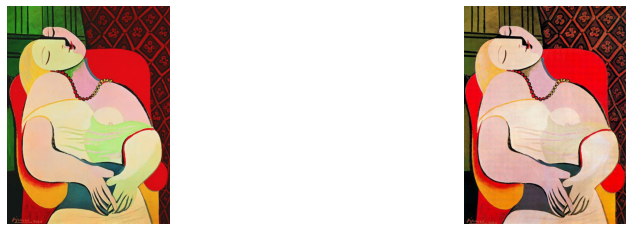

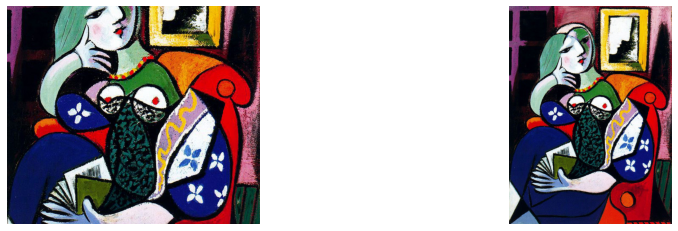

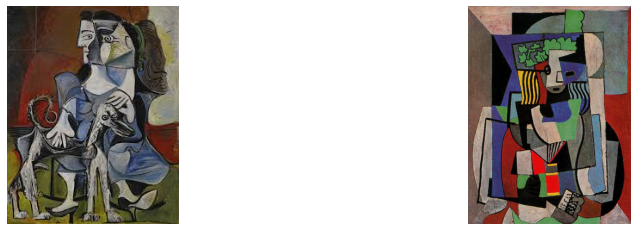

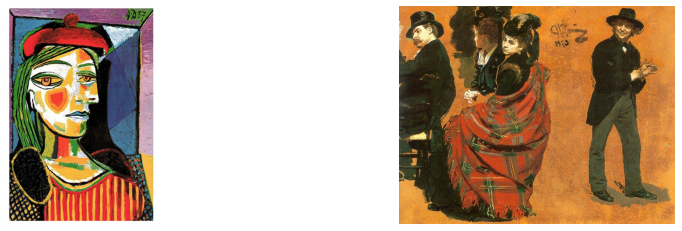

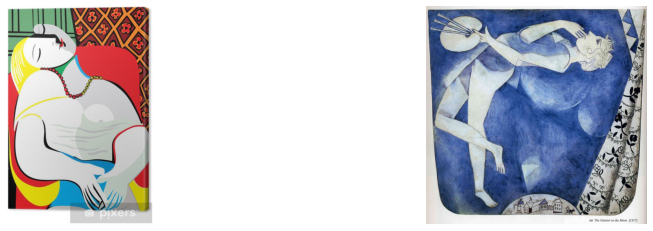

In [123]:
predict_image = []
for j in range(len(img_list_imext)):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    img = plt.imread(os.path.join(test_dir_imext, '_1', img_list_imext[j]))
    ax[0].imshow(img)
    ax[0].axis('off')
    
    dist_list = []
    for i in range(len(image_embeddings)):
        dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_imext[j])**2)))
    print(np.min(dist_list))
    predict_image.append(img_list[np.argmin(dist_list)])
    
    for k in range(1, 13):
        path_img = os.path.join(test_dir, f"_{k}", img_list[np.argmin(dist_list)])
        if os.path.isfile(path_img):
            img_orig = plt.imread(path_img)
            ax[1].imshow(img_orig)
            ax[1].axis('off')
predict_image

## test selection images

In [125]:
for im, lab in test_dataset.take(1):
    print(im.shape)
    print(lab.shape)

(32, 224, 224, 3)
(32,)


In [126]:
label_list = np.concatenate([lab for im, lab in test_dataset])
label_list

array([b'100191.jpg', b'100948.jpg', b'101589.jpg', ..., b'95784.jpg',
       b'98440.jpg', b'99128.jpg'], dtype=object)

"b'100191.jpg'"

In [154]:
label_list_2 = [int(str(l).replace('.jpg', '').replace('b', '').replace("'", '')) for l in label_list]

[100191, 100948, 101589, 10197, 102656]

In [127]:
image_list = np.concatenate([im for im, lab in test_dataset])

In [157]:
ind = np.where(np.array(label_list_2) < 2000)
ind[0]

array([   5,    8,   12,   13,  115,  134,  135,  143,  196,  226,  372,
        374,  498,  603,  615,  618,  788,  937,  938,  948,  977, 1014,
       1114, 1181, 1185, 1190, 1292, 1298, 1301, 1339], dtype=int64)

In [159]:
np.array(label_list_2)[ind[0]]

array([1105,   13, 1558, 1703,  971, 1378, 1418, 1597,  542,  774, 1198,
       1240, 1758,  949, 1335, 1553,  544,  799,   81,   87,  112,  447,
        454, 1013, 1368, 1798, 1298, 1386, 1652,  521])

In [160]:
image_list.shape

(1390, 224, 224, 3)

In [161]:
image_list2 = image_list[ind[0],:,:,:]

In [162]:
image_list2.shape

(30, 224, 224, 3)